In [3]:
import requests
import pandas as pd
import numpy as np

In [4]:
url ='https://fantasy.premierleague.com/api/bootstrap-static/'

In [5]:
r = requests.get(url)

In [6]:
json = r.json()

In [7]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [8]:
elements_df = pd.DataFrame(json['elements']) #Creating data frame for element
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [9]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,-1,1,-1,1,0,1,1.0,...,428,44,205,13,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,258,10,329,30,NaN,,NaN,,NaN,
2,50.0,50.0,47431,0,0,-1,1,0,3,-0.2,...,552,230,555,231,4.0,,2.0,,NaN,
3,100.0,50.0,54694,0,0,-1,1,0,4,0.0,...,114,27,240,32,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,0,0,0,2,0.0,...,315,122,197,68,NaN,,5.0,,NaN,


In [10]:
elements_df.columns.sort_values()

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'corners_and_indirect_freekicks_order',
       'corners_and_indirect_freekicks_text', 'cost_change_event',
       'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall',
       'creativity', 'creativity_rank', 'creativity_rank_type',
       'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank',
       'ict_index_rank_type', 'id', 'in_dreamteam', 'influence',
       'influence_rank', 'influence_rank_type', 'minutes', 'news',
       'news_added', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'penalties_text', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_

In [12]:
slim_elements_df = elements_df[['first_name','second_name','team', 'element_type','selected_by_percent', 'now_cost','minutes','threat', 'value_season','now_cost','total_points']]

In [13]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points
0,Bernd,Leno,1,1,1.9,49,180,0.0,0.6,49,3
1,Rúnar Alex,Rúnarsson,1,1,1.3,40,0,0.0,0.0,40,0
2,Willian,Borges Da Silva,1,3,0.2,64,0,0.0,0.0,64,0
3,Pierre-Emerick,Aubameyang,1,4,1.2,99,29,19.0,0.1,99,1
4,Cédric,Soares,1,2,0.2,45,90,0.0,0.2,45,1


In [14]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name) #similar to a v-lookup, using 'id column' as set index, then locating the corresponding 'singular name'

C:\Users\Emmanuel\AppData\Local\Temp/ipykernel_55988/2072665155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name) #similar to a v-lookup, using 'id column' as set index, then locating the corresponding 'singular name'


In [15]:
slim_elements_df.head()


,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position
0,Bernd,Leno,1,1,1.9,49,180,0.0,0.6,49,3,Goalkeeper
1,Rúnar Alex,Rúnarsson,1,1,1.3,40,0,0.0,0.0,40,0,Goalkeeper
2,Willian,Borges Da Silva,1,3,0.2,64,0,0.0,0.0,64,0,Midfielder
3,Pierre-Emerick,Aubameyang,1,4,1.2,99,29,19.0,0.1,99,1,Forward
4,Cédric,Soares,1,2,0.2,45,90,0.0,0.2,45,1,Defender


In [16]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)  #adds a new column "team" from teams_df using map

C:\Users\Emmanuel\AppData\Local\Temp/ipykernel_55988/1835604597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)  #adds a new column "team" from teams_df using map


In [17]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float) #Converts the data values to float

C:\Users\Emmanuel\AppData\Local\Temp/ipykernel_55988/274112818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float) #Converts the data values to float


In [18]:
slim_elements_df.head()


,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
0,Bernd,Leno,Arsenal,1,1.9,49,180,0.0,0.6,49,3,Goalkeeper,0.6
1,Rúnar Alex,Rúnarsson,Arsenal,1,1.3,40,0,0.0,0.0,40,0,Goalkeeper,0.0
2,Willian,Borges Da Silva,Arsenal,3,0.2,64,0,0.0,0.0,64,0,Midfielder,0.0
3,Pierre-Emerick,Aubameyang,Arsenal,4,1.2,99,29,19.0,0.1,99,1,Forward,0.1
4,Cédric,Soares,Arsenal,2,0.2,45,90,0.0,0.2,45,1,Defender,0.2


In [19]:
slim_elements_df.sort_values('value', ascending = False).head(10)  #Displays 10 columns and sets sort order using the 'value' column

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
310,Konstantinos,Tsimikas,Liverpool,2,29.4,42,180,39.0,4.0,42,17,Defender,4.0
95,Shane,Duffy,Brighton,2,9.2,41,180,110.0,3.9,41,16,Defender,3.9
526,Saïd,Benrahma,West Ham,3,19.3,62,174,90.0,3.9,62,24,Midfielder,3.9
520,Michail,Antonio,West Ham,4,36.5,77,178,142.0,3.8,77,29,Forward,3.8
152,Marcos,Alonso,Chelsea,2,8.3,56,175,35.0,3.8,56,21,Defender,3.8
448,Hugo,Lloris,Spurs,1,6.3,55,180,0.0,3.8,55,21,Goalkeeper,3.8
79,Ethan,Pinnock,Brentford,2,5.4,46,180,4.0,3.7,46,17,Defender,3.7
172,Reece,James,Chelsea,2,9.4,55,113,67.0,3.5,55,19,Defender,3.5
64,Pontus,Jansson,Brentford,2,1.1,45,180,2.0,3.3,45,15,Defender,3.3
68,David,Raya Martin,Brentford,1,5.0,45,180,0.0,3.1,45,14,Goalkeeper,3.1


In [20]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc = np.mean).reset_index()  #Creates a pivot table 

pivot.sort_values('value', ascending= False)

,position,value
0,Defender,0.596392
3,Midfielder,0.530085
2,Goalkeeper,0.485000
1,Forward,0.434211


In [21]:
slim_elements_df = slim_elements_df.loc[slim_elements_df > 0] 

TypeError: '>' not supported between instances of 'str' and 'int'

In [25]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc = np.mean).reset_index()

In [26]:
pivot.sort_values('value', ascending = False)

,position,value
0,Defender,0.596907
3,Midfielder,0.530085
2,Goalkeeper,0.485000
1,Forward,0.434211


In [27]:
pivot = slim_elements_df.pivot_table(index = 'team', values = 'value', aggfunc = np.mean).reset_index()

pivot.sort_values('value', ascending = False)

,team,value
5,Chelsea,0.917241
2,Brentford,0.903571
16,Spurs,0.821429
18,West Ham,0.808333
10,Liverpool,0.760000
11,Man City,0.683333
3,Brighton,0.680645
1,Aston Villa,0.600000
12,Man Utd,0.544444
9,Leicester,0.542308


<AxesSubplot:>

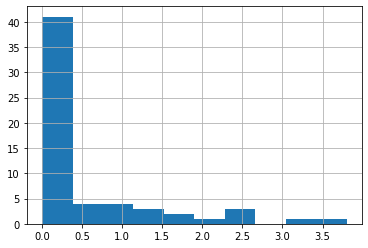

In [37]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']

goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

goal_df.value.hist()

In [31]:
goal_df.value.hist()

NameError: name 'goal_df' is not defined

In [49]:
sort_mid_value = mid_df.sort_values('value_season', ascending = False)

sort_mid_value.head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
526,Saïd,Benrahma,West Ham,3,19.1,62,174,90.0,3.9,62,24,Midfielder,3.9
343,Paul,Pogba,Man Utd,3,17.8,77,164,85.0,2.6,77,20,Midfielder,2.6
69,Sergi,Canós,Brentford,3,3.3,55,180,37.0,2.5,55,14,Midfielder,2.5
359,Mason,Greenwood,Man Utd,3,11.9,76,180,58.0,2.4,76,18,Midfielder,2.4
216,Abdoulaye,Doucouré,Everton,3,1.4,55,180,53.0,2.2,55,12,Midfielder,2.2
112,Alexis,Mac Allister,Brighton,3,0.6,55,104,56.0,2.2,55,12,Midfielder,2.2
108,Yves,Bissouma,Brighton,3,14.6,45,180,7.0,2.2,45,10,Midfielder,2.2
530,Pablo,Fornals,West Ham,3,0.6,60,180,45.0,2.2,60,13,Midfielder,2.2
305,Diogo,Jota,Liverpool,3,15.4,76,140,73.0,2.1,76,16,Midfielder,2.1
65,Christian,Nørgaard,Brentford,3,1.3,50,180,40.0,2.0,50,10,Midfielder,2.0


In [42]:
goal_df.head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
0,Bernd,Leno,Arsenal,1,1.9,49,180,0.0,0.6,49,3,Goalkeeper,0.6
1,Rúnar Alex,Rúnarsson,Arsenal,1,1.3,40,0,0.0,0.0,40,0,Goalkeeper,0.0
31,Karl,Hein,Arsenal,1,0.2,40,0,0.0,0.0,40,0,Goalkeeper,0.0
33,Aaron,Ramsdale,Arsenal,1,0.1,45,0,0.0,0.0,45,0,Goalkeeper,0.0
34,Jed,Steer,Aston Villa,1,1.2,40,0,0.0,0.0,40,0,Goalkeeper,0.0
36,Emiliano,Martínez,Aston Villa,1,31.3,55,180,0.0,1.3,55,7,Goalkeeper,1.3
68,David,Raya Martin,Brentford,1,5.0,45,180,0.0,3.1,45,14,Goalkeeper,3.1
80,Ellery,Balcombe,Brentford,1,0.0,40,0,0.0,0.0,40,0,Goalkeeper,0.0
82,Patrik,Gunnarsson,Brentford,1,1.5,40,0,0.0,0.0,40,0,Goalkeeper,0.0
91,Álvaro,Fernández,Brentford,1,0.0,45,0,0.0,0.0,45,0,Goalkeeper,0.0


In [33]:
slim_elements_df.to_csv('GW1-2.csv')